# Objective
#### This data set used to answer the following question: Can you predict who would be interested in buying a caravan insurance policy and give an explanation why?

#### This dataset is owned and supplied by the Dutch datamining company Sentient Machine Research, and is based on real world business data. You are allowed to use this dataset and accompanying information for non commercial research and education purposes only. It is explicitly not allowed to use this dataset for commercial education or demonstration purposes. For any other use, please contact Peter van der Putten, info@smr.nl.
#### The main objective here is to score clients so we know who to email . We will evaluate our models using ROC curve and AUC.

In [356]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [357]:
df = pd.read_csv('caravan-insurance-challenge.csv')
original = df.copy()
df.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


In [358]:
df.shape

(9822, 87)

#### adding the real labels 

In [359]:
labels = ['ORIGIN', 'CustomerSubtype', 'NumberOfHouses1', 'AvgSizeHousehold1', 'AvgAge', 'CustomerMainType', 
          'RomanCatholic', 'Protestant...', 'OtherReligion', 'NoReligion', 'Married', 'LivingTogether', 'OtherRelation', 
          'Singles', 'HouseholdWithoutChildren', 'HouseholdWithChildren', 'HighLevelEducation', 'MediumLevelEducation', 
          'LowerLevelEducation', 'HighStatus', 'Entrepreneur', 'Farmer', 'MiddleManagement', 'SkilledLabourers', 
          'UnskilledLabourers', 'SocialClassA', 'SocialClassB1', 'SocialClassB2', 'SocialClassC', 'SocialClassD', 
          'RentedHouse', 'HomeOwners', '1Car', '2Cars', 'NoCar', 'NationalHealthService', 'PrivateHealthInsurance', 
          'Income<30.000', 'Income30-45.000', 'Income45-75.000', 'Income75-122.000', 'Income>123.000', 'AverageIncome', 
          'PurchasingPowerClass', 'ContributionPrivateThirdPartyInsurance', 'ContributionThirdPartyInsurance(firms)...', 
          'ContributionThirdPartyInsurane(agriculture)', 'ContributionCarPolicies', 'ContributionDeliveryVanPolicies', 
          'ContributionMotorcycle/scooterPolicies', 'ContributionLorryPolicies', 'ContributionTrailerPolicies', 
          'ContributionTractorPolicies', 'ContributionAgriculturalMachinesPolicies', 'ContributionMopedPolicies', 
          'ContributionLifeInsurances', 'ContributionPrivateAccidentInsurancePolicies', 
          'ContributionFamilyAccidentsInsurancePolicies', 'ContributionDisabilityInsurancePolicies', 
          'ContributionFirePolicies', 'ContributionSurfboardPolicies', 'ContributionBoatPolicies', 
          'ContributionBicyclePolicies', 'ContributionPropertyInsurancePolicies', 'ContributionSocialSecurityInsurancePolicies',
          'NumberOfPrivateThirdPartyInsurance1-12', 'NumberOfThirdPartyInsurance(firms)...', 
          'NumberOfThirdPartyInsurane(agriculture)', 'NumberOfCarPolicies', 'NumberOfDeliveryVanPolicies', 
          'NumberOfMotorcycle/scooterPolicies', 'NumberOfLorryPolicies', 'NumberOfTrailerPolicies', 'NumberOfTractorPolicies', 
          'NumberOfAgriculturalMachinesPolicies', 'NumberOfMopedPolicies', 'NumberOfLifeInsurances', 
          'NumberOfPrivateAccidentInsurancePolicies', 'NumberOfFamilyAccidentsInsurancePolicies', 
          'NumberOfDisabilityInsurancePolicies', 'NumberOfFirePolicies', 'NumberOfSurfboardPolicies', 'NumberOfBoatPolicies', 
          'NumberOfBicyclePolicies', 'NumberOfPropertyInsurancePolicies', 'NumberOfSocialSecurityInsurancePolicies', 'CARAVAN']

In [360]:
len(labels)

87

In [361]:
df.ORIGIN.value_counts()

train    5822
test     4000
Name: ORIGIN, dtype: int64

### Data preparation

In [362]:
df.columns = labels

In [363]:
df.shape

(9822, 87)

In [364]:
df.head()

,ORIGIN,CustomerSubtype,NumberOfHouses1,AvgSizeHousehold1,AvgAge,CustomerMainType,RomanCatholic,Protestant...,OtherReligion,NoReligion,...,NumberOfPrivateAccidentInsurancePolicies,NumberOfFamilyAccidentsInsurancePolicies,NumberOfDisabilityInsurancePolicies,NumberOfFirePolicies,NumberOfSurfboardPolicies,NumberOfBoatPolicies,NumberOfBicyclePolicies,NumberOfPropertyInsurancePolicies,NumberOfSocialSecurityInsurancePolicies,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


### Data Insight Report

In [365]:
# Define Utiliy Functions
def data_insights_report(data=pd.DataFrame()):
    report = pd.DataFrame()
    report['Columns'] = data.columns
    report['Data_Types'] = data.dtypes.values
    report['Unique_Count'] = data.nunique().values
    report['NAN_Count'] = data.isna().sum().values

    tempdf = data.describe().apply(lambda x: round(x,2), axis=1).T
    pd.merge(report,tempdf.reset_index().rename(columns={'index':'Columns'}), on='Columns')

    return report.join(tempdf, on='Columns')
data_insights_report(df) # This report gives as view of the data, its metrics and basic actionable Insights

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,ORIGIN,object,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerSubtype,int64,40,0,9822.0,24.25,12.92,1.0,10.0,30.0,35.0,41.0
2,NumberOfHouses1,int64,9,0,9822.0,1.11,0.41,1.0,1.0,1.0,1.0,10.0
3,AvgSizeHousehold1,int64,6,0,9822.0,2.68,0.78,1.0,2.0,3.0,3.0,6.0
4,AvgAge,int64,6,0,9822.0,3.00,0.80,1.0,2.0,3.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,NumberOfBoatPolicies,int64,3,0,9822.0,0.01,0.08,0.0,0.0,0.0,0.0,2.0
83,NumberOfBicyclePolicies,int64,5,0,9822.0,0.03,0.21,0.0,0.0,0.0,0.0,4.0
84,NumberOfPropertyInsurancePolicies,int64,3,0,9822.0,0.01,0.09,0.0,0.0,0.0,0.0,2.0
85,NumberOfSocialSecurityInsurancePolicies,int64,3,0,9822.0,0.01,0.12,0.0,0.0,0.0,0.0,2.0


### Pre Processing the Data

In [366]:
#percentage of null values
temp_df = df.isnull().sum().reset_index()
temp_df['Percentage'] = (temp_df[0]/len(df))*100
temp_df.columns = ['Column Name', 'Number of null values', 'Null values in percentage']
print(f"The length of dataset is \t {len(df)}")
temp_df

The length of dataset is 	 9822


,Column Name,Number of null values,Null values in percentage
0,ORIGIN,0,0.0
1,CustomerSubtype,0,0.0
2,NumberOfHouses1,0,0.0
3,AvgSizeHousehold1,0,0.0
4,AvgAge,0,0.0
...,...,...,...
82,NumberOfBoatPolicies,0,0.0
83,NumberOfBicyclePolicies,0,0.0
84,NumberOfPropertyInsurancePolicies,0,0.0
85,NumberOfSocialSecurityInsurancePolicies,0,0.0


In [367]:
df.isnull().any().sum()

0

In [368]:
df['CARAVAN'].value_counts()

0    9236
1     586
Name: CARAVAN, dtype: int64

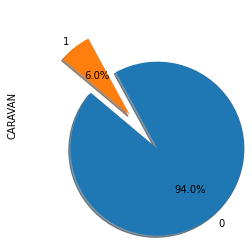

In [369]:
df.CARAVAN.value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=140,explode=(0.5, 0));

## Conclusion:
#### It's a dataset with 9822 observations.
#### The dataset is without null values and outliers
#### The dataset is imbalanced as Yes answer represent only 6%

In [370]:
df.dtypes.value_counts()

int64     86
object     1
dtype: int64

In [371]:
categorical = df.select_dtypes(include = 'object')
print(len(categorical.columns))

1


In [372]:
df_numerical=df._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 86 columns):
CustomerSubtype                                 9822 non-null int64
NumberOfHouses1                                 9822 non-null int64
AvgSizeHousehold1                               9822 non-null int64
AvgAge                                          9822 non-null int64
CustomerMainType                                9822 non-null int64
RomanCatholic                                   9822 non-null int64
Protestant...                                   9822 non-null int64
OtherReligion                                   9822 non-null int64
NoReligion                                      9822 non-null int64
Married                                         9822 non-null int64
LivingTogether                                  9822 non-null int64
OtherRelation                                   9822 non-null int64
Singles                                         9822 non-null int64
Household

In [373]:
df_numerical.head()

,CustomerSubtype,NumberOfHouses1,AvgSizeHousehold1,AvgAge,CustomerMainType,RomanCatholic,Protestant...,OtherReligion,NoReligion,Married,...,NumberOfPrivateAccidentInsurancePolicies,NumberOfFamilyAccidentsInsurancePolicies,NumberOfDisabilityInsurancePolicies,NumberOfFirePolicies,NumberOfSurfboardPolicies,NumberOfBoatPolicies,NumberOfBicyclePolicies,NumberOfPropertyInsurancePolicies,NumberOfSocialSecurityInsurancePolicies,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [374]:
yes = df[df.CARAVAN == 1].copy()

### Customer Sub Type

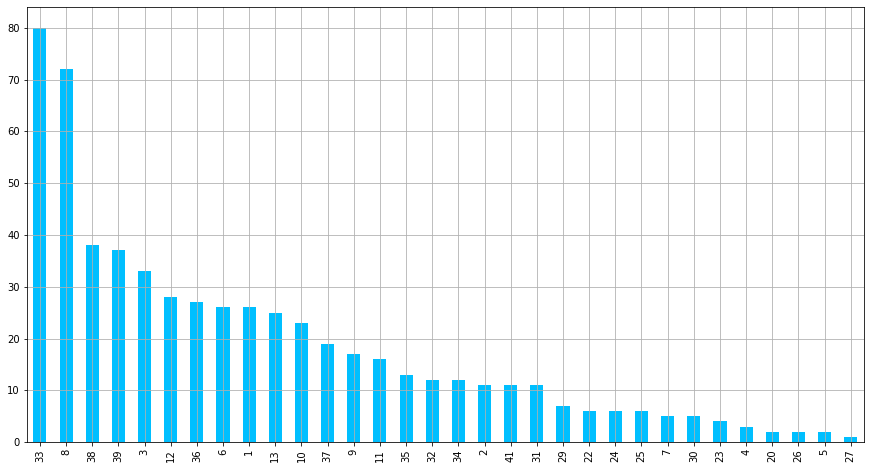

In [375]:
plt.figure(figsize=(15,8))
yes['CustomerSubtype'].value_counts().plot(kind='bar', align='center',color='deepskyblue', grid=True);

## Age

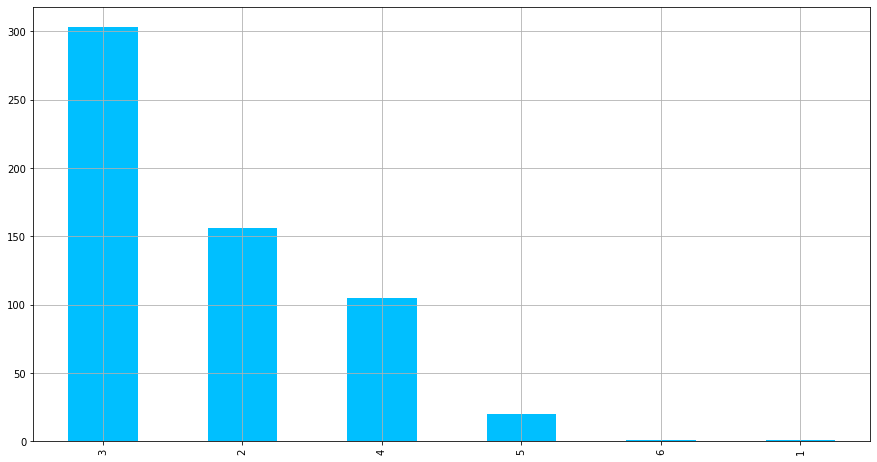

In [376]:
plt.figure(figsize=(15,8))
yes['AvgAge'].value_counts().plot(kind='bar', align='center',color='deepskyblue', grid=True);

### Customer main type

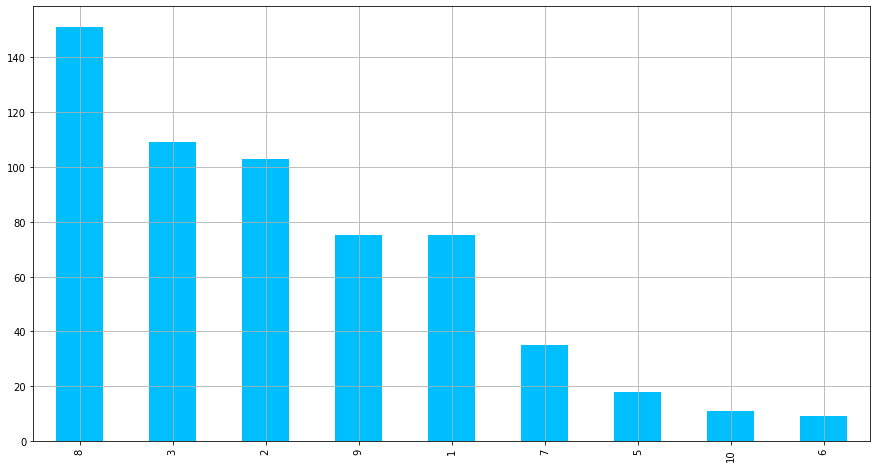

In [377]:
plt.figure(figsize=(15,8))
yes['CustomerMainType'].value_counts().plot(kind='bar', align='center',color='deepskyblue', grid=True);

In [378]:
df.dtypes.value_counts()

int64     86
object     1
dtype: int64

## Model Training

In [379]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [380]:
train = df[df.ORIGIN == 'train'].copy()
test = df[df.ORIGIN == 'test'].copy()

In [381]:
Train_Y = train.CARAVAN
Train_X = train.drop(['CARAVAN','ORIGIN'], axis=1)

In [382]:
Test_Y = test.CARAVAN
Test_X = test.drop(['CARAVAN','ORIGIN'], axis=1)

## KNN

In [383]:
from sklearn import neighbors
print("Nearest Neighbors Dataframe Test score :")
clf = neighbors.KNeighborsClassifier(3,'distance')
clf.fit(X=Train_X,y=Train_Y)
clf.score(Test_X,Test_Y)

Nearest Neighbors Dataframe Test score :


0.92275

In [384]:
KNN_y_pred_class = clf.predict(Test_X)
class_names = np.unique(np.array(Test_Y))
confusion_matrix(Test_Y, KNN_y_pred_class)

array([[3667,   95],
       [ 214,   24]], dtype=int64)

In [385]:
from sklearn.metrics import classification_report
print(classification_report(Test_Y, KNN_y_pred_class))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3762
           1       0.20      0.10      0.13       238

    accuracy                           0.92      4000
   macro avg       0.57      0.54      0.55      4000
weighted avg       0.90      0.92      0.91      4000



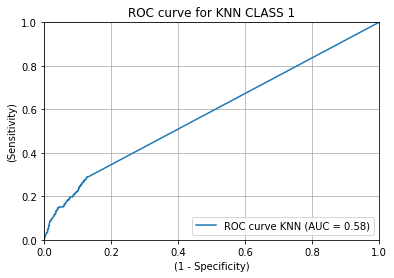

In [386]:
from sklearn.metrics import roc_curve, auc
knn_pred_prob = clf.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, knn_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve KNN (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### SVM

In [387]:
from sklearn.svm import SVC
clf_S = SVC(kernel='rbf',probability=True,random_state=0, gamma=.01, C=100000)
clf_S.fit(Train_X, Train_Y) 
print("SVM Dataframe Test score :")
print(clf_S.score(Test_X,Test_Y))

SVM Dataframe Test score :
0.8995


In [388]:
SVM_y_pred_class = clf_S.predict(Test_X)
class_names = np.unique(np.array(Test_Y))
confusion_matrix(Test_Y, SVM_y_pred_class)

array([[3570,  192],
       [ 210,   28]], dtype=int64)

In [389]:
from sklearn.metrics import classification_report
report = classification_report(Test_Y,SVM_y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3762
           1       0.13      0.12      0.12       238

    accuracy                           0.90      4000
   macro avg       0.54      0.53      0.53      4000
weighted avg       0.90      0.90      0.90      4000



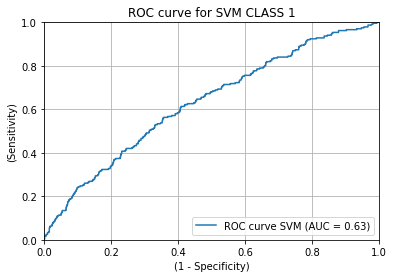

In [390]:
from sklearn.metrics import roc_curve, auc
svm_pred_prob = clf_S.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, svm_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve SVM (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for SVM CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [391]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(Train_X, Train_Y) 
print(clf_tree.score(Test_X,Test_Y))

0.892


In [392]:
tree_y_pred_class = clf_tree.predict(Test_X)
class_names = np.unique(np.array(Test_Y))
confusion_matrix(Test_Y, tree_y_pred_class)

array([[3537,  225],
       [ 207,   31]], dtype=int64)

In [393]:
print(classification_report(Test_Y, KNN_y_pred_class))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3762
           1       0.20      0.10      0.13       238

    accuracy                           0.92      4000
   macro avg       0.57      0.54      0.55      4000
weighted avg       0.90      0.92      0.91      4000



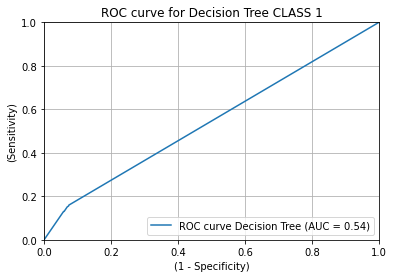

In [394]:
from sklearn.metrics import roc_curve, auc
tree_pred_prob = clf_tree.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, tree_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Decision Tree (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Decision Tree CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()


### Random Forest

In [395]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Train_X, Train_Y) 
print(rf.score(Test_X,Test_Y))

0.93325


In [396]:
rf_y_pred_class = rf.predict(Test_X)
class_names = np.unique(np.array(Test_Y))
confusion_matrix(Test_Y, rf_y_pred_class)

array([[3718,   44],
       [ 223,   15]], dtype=int64)

In [397]:
print(classification_report(Test_Y, rf_y_pred_class))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3762
           1       0.25      0.06      0.10       238

    accuracy                           0.93      4000
   macro avg       0.60      0.53      0.53      4000
weighted avg       0.90      0.93      0.91      4000



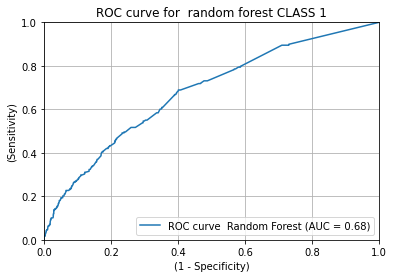

In [398]:
from sklearn.metrics import roc_curve, auc
rf_pred_prob = rf.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, rf_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve  Random Forest (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for  random forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()


## A small tuning of the random forest gets us an even better AUC

In [399]:
rf = RandomForestClassifier(n_estimators=100,max_leaf_nodes=3)
rf.fit(Train_X, Train_Y) 
print(rf.score(Test_X,Test_Y))

0.9405


In [400]:
rf_y_pred_class = rf.predict(Test_X)
class_names = np.unique(np.array(Test_Y))
confusion_matrix(Test_Y, rf_y_pred_class)

array([[3762,    0],
       [ 238,    0]], dtype=int64)

In [401]:
print(classification_report(Test_Y, rf_y_pred_class))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.00      0.00      0.00       238

    accuracy                           0.94      4000
   macro avg       0.47      0.50      0.48      4000
weighted avg       0.88      0.94      0.91      4000



C:\Users\Priyanka\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


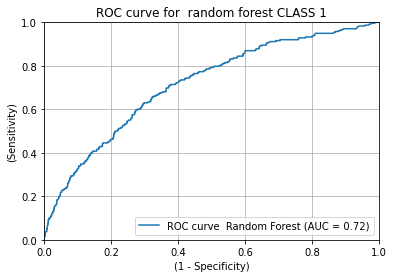

In [402]:
from sklearn.metrics import roc_curve, auc
rf_pred_prob = rf.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, rf_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve  Random Forest (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for  random forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### This model seems good enough let's plot feature importance using a function from the fast ai library

In [403]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
fi = rf_feat_importance(rf, Train_X); fi[:10]

,cols,imp
46,ContributionCarPolicies,0.194742
67,NumberOfCarPolicies,0.108152
81,NumberOfBoatPolicies,0.070894
58,ContributionFirePolicies,0.061133
4,CustomerMainType,0.054473
60,ContributionBoatPolicies,0.044548
41,AverageIncome,0.041439
43,ContributionPrivateThirdPartyInsurance,0.040847
0,CustomerSubtype,0.036068
30,HomeOwners,0.035564


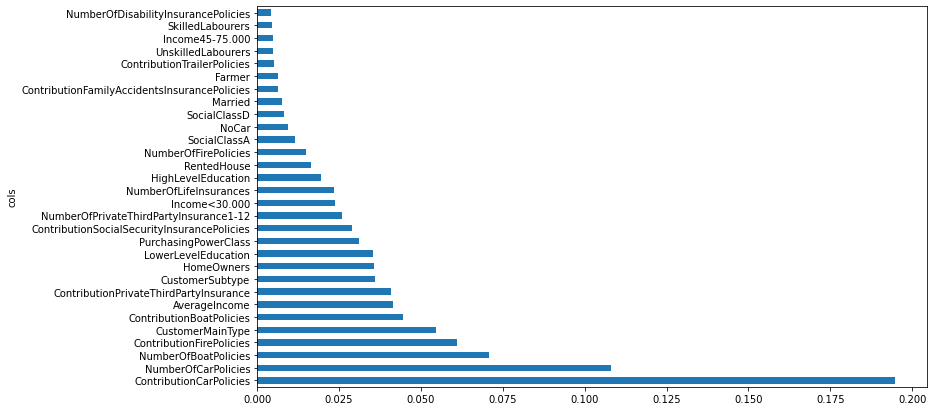

In [404]:
plot_fi(fi[:30]);

### Balanced Models

#### Balanced Random Forest

In [405]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [406]:
brf=BalancedRandomForestClassifier()

In [407]:
brf.fit(X = Train_X,y = Train_Y)

BalancedRandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=None,
                               max_features='auto', max_leaf_nodes=None,
                               max_samples=None, min_impurity_decrease=0.0,
                               min_samples_leaf=2, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=None, oob_score=False, random_state=None,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

In [408]:
print("Test score :")
print(brf.score(Test_X,Test_Y))

Test score :
0.678


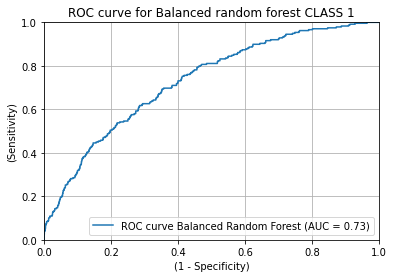

In [409]:
from sklearn.metrics import roc_curve, auc
brf_pred_prob = brf.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, brf_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Balanced Random Forest (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Balanced random forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### This balanced random forest model seems to be outperforming the others , trying to tune it doesn't seem to improve our AUC.

In [410]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X=Train_X,y=Train_Y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [411]:
print("Test score :")
print(lda.score(Test_X,Test_Y))

Test score :
0.935


In [412]:
from sklearn.metrics import accuracy_score, classification_report

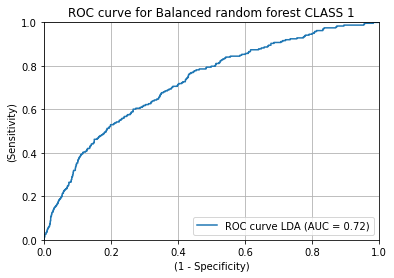

In [413]:
lda_pred_prob = lda.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, lda_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve LDA (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Balanced random forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### XGBOOST

In [414]:
from xgboost import XGBClassifier
train = original[original.ORIGIN == 'train'].copy()
test = original[original.ORIGIN == 'test'].copy()

m = XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
Train_Y = train.CARAVAN
Train_X = train.drop(['CARAVAN','ORIGIN'], axis=1)
Test_Y = test.CARAVAN
Test_X = test.drop(['CARAVAN','ORIGIN'], axis=1)
m.fit(Train_X,Train_Y, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [415]:
print("Test score :")
print(m.score(Test_X,Test_Y))

Test score :
0.94075


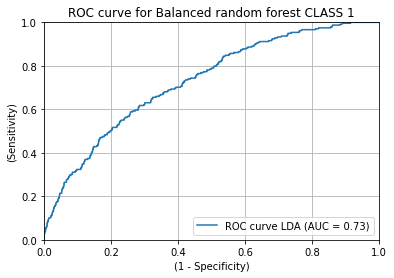

In [416]:
xgb_pred_prob = m.predict_proba(Test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(Test_Y, xgb_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve LDA (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Balanced random forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()


## Comparing the models

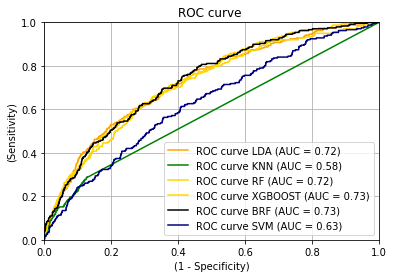

In [417]:
fpr6, tpr6, thresholds6 = roc_curve(Test_Y, lda_pred_prob)
roc_auc6 = auc(fpr6, tpr6)

fpr5, tpr5, thresholds5 = roc_curve(Test_Y, knn_pred_prob)
roc_auc5 = auc(fpr5, tpr5)

fpr4, tpr4, thresholds4 = roc_curve(Test_Y, rf_pred_prob)
roc_auc4 = auc(fpr4, tpr4)

fpr3, tpr3, thresholds3 = roc_curve(Test_Y, xgb_pred_prob)
roc_auc3 = auc(fpr3, tpr3)

fpr2, tpr2, thresholds2 = roc_curve(Test_Y, brf_pred_prob)
roc_auc2 = auc(fpr2, tpr2)

fpr1, tpr1, thresholds1 = roc_curve(Test_Y,svm_pred_prob)
roc_auc1 = auc(fpr1, tpr1)
lw = 2
plt.plot(fpr6, tpr6,color='orange',label='ROC curve LDA (AUC = %0.2f)' % roc_auc6)
plt.plot(fpr5, tpr5,color='green',label='ROC curve KNN (AUC = %0.2f)' % roc_auc5)
plt.plot(fpr4, tpr4,color='gold',label='ROC curve RF (AUC = %0.2f)' % roc_auc4)
plt.plot(fpr3, tpr3,color='gold',label='ROC curve XGBOOST (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr2, tpr2,color='black',label='ROC curve BRF (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr1, tpr1,color='navy',label='ROC curve SVM (AUC = %0.2f)' % roc_auc1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve ')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()


### Scoring:
##### Balanced Random Forest seems to offer the best results with an AUC of 0.73 , we will use this model for our scoring

In [418]:
test_target = Test_Y.copy()
test_target.reset_index(drop=True, inplace=True)
test_target=test_target.replace({
    1:'Yes',
    0:'No'
})
predicted_target=brf.predict(Test_X)
predicted_target=pd.Series(predicted_target).replace({
    1:'Yes',
    0:'No'
})

In [419]:
ranks=pd.DataFrame(data={
    'realClass':test_target,
    'predictedClass':predicted_target,
    'rank':brf_pred_prob
})
ranks.sort_values(by=['rank'],ascending=False,inplace=True)
ranks.head()

,realClass,predictedClass,rank
2164,Yes,Yes,0.945095
2621,Yes,Yes,0.942986
1333,Yes,Yes,0.932464
3092,Yes,Yes,0.931000
706,No,Yes,0.920755


In [420]:
top = ranks.where(ranks['rank']>0.5,).dropna()
top.head()

,realClass,predictedClass,rank
2164,Yes,Yes,0.945095
2621,Yes,Yes,0.942986
1333,Yes,Yes,0.932464
3092,Yes,Yes,0.931000
706,No,Yes,0.920755


In [421]:
top.shape

(1352, 3)

## Conclusion
In this modeling process has provided some useful insights about the target market. In particular, it can be safely concluded that the target market is probably not a single group. There are at least two main customer profiles who are likely to own caravans and therefore are potential buyers of Caravan Insurance. For marketing purposes, each group would probably need to be approached in different ways, both in terms of the communication message as well as the medium of communication. We identified 1322 customer who have higher probability of answering the mails.